Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [78]:
#Uploading the the data set
data =pd.read_csv('Final_car.csv')

In [79]:
ds=pd.DataFrame(data=data)
ds

,Unnamed: 0,Brand,Price,Model,KMS_driven,Fuel,Variant
0,0,2017 Maruti Swift,5.79 Lakh,VDI BSIV,"84,730 kms",Diesel,Manual
1,1,2017 Maruti Ignis,4.93 Lakh,1.2 Zeta BSIV,"36,985 kms",Petrol,Manual
2,2,2012 Hyundai i10,3.41 Lakh,Sportz,"73,717 kms",Petrol,Manual
3,3,2017 Maruti Celerio,4.14 Lakh,ZXI,"25,149 kms",Petrol,Manual
4,4,2018 Maruti Ignis,4.7 Lakh,1.2 Delta BSIV,"7,714 kms",Petrol,Manual
...,...,...,...,...,...,...,...
5039,5039,2018 Honda BR-V,8.35 Lakh,i-VTEC S MT,"8,972 kms",Petrol,Manual
5040,5040,2015 Mercedes-Benz S-Class,53.75 Lakh,S 350 CDI,"53,500 kms",Diesel,Automatic
5041,5041,2018 Mahindra Scorpio,9.9 Lakh,S5 BSIV,"65,700 kms",Diesel,Manual
5042,5042,2013 Mercedes-Benz M-Class,20 Lakh,ML 350 4Matic,"53,000 kms",Diesel,Automatic


# EDA

In [80]:
ds.shape

(5044, 7)

In [81]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5044 non-null   int64 
 1   Brand       5044 non-null   object
 2   Price       5044 non-null   object
 3   Model       5044 non-null   object
 4   KMS_driven  5044 non-null   object
 5   Fuel        5044 non-null   object
 6   Variant     5044 non-null   object
dtypes: int64(1), object(6)
memory usage: 276.0+ KB


There are 5044 rows and 6 columns.

In [82]:
ds.isnull().sum()

Unnamed: 0    0
Brand         0
Price         0
Model         0
KMS_driven    0
Fuel          0
Variant       0
dtype: int64

There are no missing values in the data set

Since our data raw and messed up. First lets make it bit meanigfull before we do visualization.

In [83]:
# Extract price in from price variable in numeric form
ds['Price'] = ds['Price'].str.split().str[0]
ds

,Unnamed: 0,Brand,Price,Model,KMS_driven,Fuel,Variant
0,0,2017 Maruti Swift,5.79,VDI BSIV,"84,730 kms",Diesel,Manual
1,1,2017 Maruti Ignis,4.93,1.2 Zeta BSIV,"36,985 kms",Petrol,Manual
2,2,2012 Hyundai i10,3.41,Sportz,"73,717 kms",Petrol,Manual
3,3,2017 Maruti Celerio,4.14,ZXI,"25,149 kms",Petrol,Manual
4,4,2018 Maruti Ignis,4.7,1.2 Delta BSIV,"7,714 kms",Petrol,Manual
...,...,...,...,...,...,...,...
5039,5039,2018 Honda BR-V,8.35,i-VTEC S MT,"8,972 kms",Petrol,Manual
5040,5040,2015 Mercedes-Benz S-Class,53.75,S 350 CDI,"53,500 kms",Diesel,Automatic
5041,5041,2018 Mahindra Scorpio,9.9,S5 BSIV,"65,700 kms",Diesel,Manual
5042,5042,2013 Mercedes-Benz M-Class,20,ML 350 4Matic,"53,000 kms",Diesel,Automatic


In [84]:
# Extract price in from price variable in numeric form
ds['KMS_driven'] = ds['KMS_driven'].str.split().str[0]
ds

,Unnamed: 0,Brand,Price,Model,KMS_driven,Fuel,Variant
0,0,2017 Maruti Swift,5.79,VDI BSIV,"84,730",Diesel,Manual
1,1,2017 Maruti Ignis,4.93,1.2 Zeta BSIV,"36,985",Petrol,Manual
2,2,2012 Hyundai i10,3.41,Sportz,"73,717",Petrol,Manual
3,3,2017 Maruti Celerio,4.14,ZXI,"25,149",Petrol,Manual
4,4,2018 Maruti Ignis,4.7,1.2 Delta BSIV,"7,714",Petrol,Manual
...,...,...,...,...,...,...,...
5039,5039,2018 Honda BR-V,8.35,i-VTEC S MT,"8,972",Petrol,Manual
5040,5040,2015 Mercedes-Benz S-Class,53.75,S 350 CDI,"53,500",Diesel,Automatic
5041,5041,2018 Mahindra Scorpio,9.9,S5 BSIV,"65,700",Diesel,Manual
5042,5042,2013 Mercedes-Benz M-Class,20,ML 350 4Matic,"53,000",Diesel,Automatic


In [85]:
# Extracting year from Brand
ds['Manuf_Year'] = ds['Brand'].str.split().str[0]
ds['Brand'] = ds['Brand'].str.split().str[1]
ds

,Unnamed: 0,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,0,Maruti,5.79,VDI BSIV,"84,730",Diesel,Manual,2017
1,1,Maruti,4.93,1.2 Zeta BSIV,"36,985",Petrol,Manual,2017
2,2,Hyundai,3.41,Sportz,"73,717",Petrol,Manual,2012
3,3,Maruti,4.14,ZXI,"25,149",Petrol,Manual,2017
4,4,Maruti,4.7,1.2 Delta BSIV,"7,714",Petrol,Manual,2018
...,...,...,...,...,...,...,...,...
5039,5039,Honda,8.35,i-VTEC S MT,"8,972",Petrol,Manual,2018
5040,5040,Mercedes-Benz,53.75,S 350 CDI,"53,500",Diesel,Automatic,2015
5041,5041,Mahindra,9.9,S5 BSIV,"65,700",Diesel,Manual,2018
5042,5042,Mercedes-Benz,20,ML 350 4Matic,"53,000",Diesel,Automatic,2013


In [86]:
# Now we can drop the extra quali which we added 
ds.drop(['Unnamed: 0'],axis=1,inplace=True)
ds

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,Maruti,5.79,VDI BSIV,"84,730",Diesel,Manual,2017
1,Maruti,4.93,1.2 Zeta BSIV,"36,985",Petrol,Manual,2017
2,Hyundai,3.41,Sportz,"73,717",Petrol,Manual,2012
3,Maruti,4.14,ZXI,"25,149",Petrol,Manual,2017
4,Maruti,4.7,1.2 Delta BSIV,"7,714",Petrol,Manual,2018
...,...,...,...,...,...,...,...
5039,Honda,8.35,i-VTEC S MT,"8,972",Petrol,Manual,2018
5040,Mercedes-Benz,53.75,S 350 CDI,"53,500",Diesel,Automatic,2015
5041,Mahindra,9.9,S5 BSIV,"65,700",Diesel,Manual,2018
5042,Mercedes-Benz,20,ML 350 4Matic,"53,000",Diesel,Automatic,2013


So finally we have 7 columns in proper shape.

<AxesSubplot:>

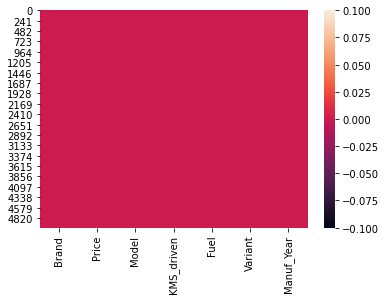

In [87]:
sns.heatmap(ds.isnull())

So there is no missing valuses in the data set

<AxesSubplot:xlabel='Fuel', ylabel='count'>

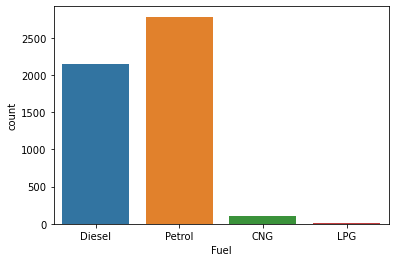

In [94]:
sns.countplot(x='Fuel',data=data)

Very few CNG and LPG fuel used cars are availble on sale

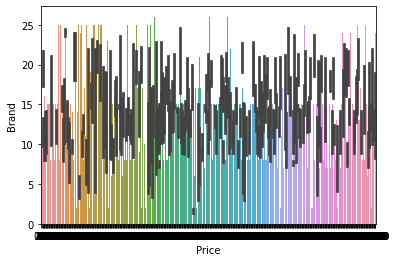

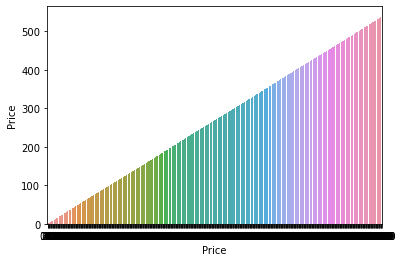

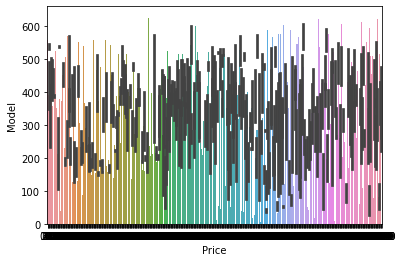

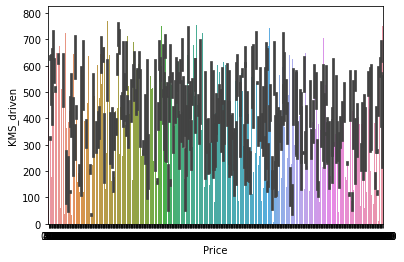

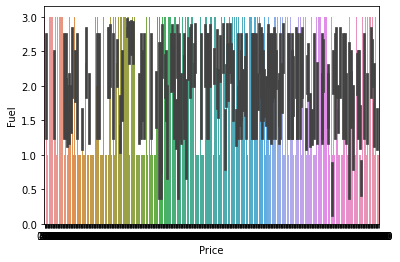

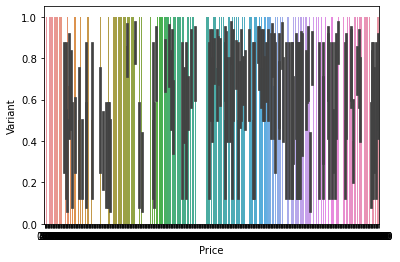

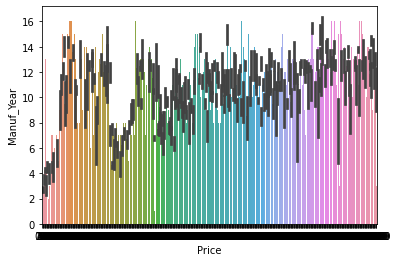

In [96]:
for i in ds.columns[:7]:
    sns.barplot(x = ds['Price'], y = ds[i])
    plt.show()

So there is no missing valuses in the data set

Summary Statistics

In [88]:
ds.describe()

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
count,5044,5044,5044,5044,5044,5044,5044
unique,27,539,630,789,4,2,18
top,Maruti,5.25,VXI,"70,000",Petrol,Manual,2017
freq,1604,60,228,64,2784,3480,652


In [90]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       5044 non-null   object
 1   Price       5044 non-null   object
 2   Model       5044 non-null   object
 3   KMS_driven  5044 non-null   object
 4   Fuel        5044 non-null   object
 5   Variant     5044 non-null   object
 6   Manuf_Year  5044 non-null   object
dtypes: object(7)
memory usage: 276.0+ KB


In [91]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i]=oe.fit_transform(data[i].values.reshape(-1,1))
ds

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,15.0,376.0,497.0,736.0,1.0,1.0,13.0
1,15.0,319.0,51.0,307.0,3.0,1.0,13.0
2,8.0,202.0,468.0,664.0,3.0,1.0,8.0
3,15.0,265.0,576.0,190.0,3.0,1.0,13.0
4,15.0,304.0,19.0,644.0,3.0,1.0,14.0
...,...,...,...,...,...,...,...
5039,7.0,493.0,610.0,706.0,3.0,1.0,14.0
5040,17.0,386.0,431.0,489.0,1.0,0.0,11.0
5041,14.0,535.0,443.0,608.0,1.0,1.0,14.0
5042,17.0,148.0,396.0,485.0,1.0,0.0,9.0


In [92]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       5044 non-null   float64
 1   Price       5044 non-null   float64
 2   Model       5044 non-null   float64
 3   KMS_driven  5044 non-null   float64
 4   Fuel        5044 non-null   float64
 5   Variant     5044 non-null   float64
 6   Manuf_Year  5044 non-null   float64
dtypes: float64(7)
memory usage: 276.0 KB


Brand            AxesSubplot(0.125,0.125;0.0545775x0.755)
Price         AxesSubplot(0.190493,0.125;0.0545775x0.755)
Model         AxesSubplot(0.255986,0.125;0.0545775x0.755)
KMS_driven    AxesSubplot(0.321479,0.125;0.0545775x0.755)
Fuel          AxesSubplot(0.386972,0.125;0.0545775x0.755)
Variant       AxesSubplot(0.452465,0.125;0.0545775x0.755)
Manuf_Year    AxesSubplot(0.517958,0.125;0.0545775x0.755)
dtype: object

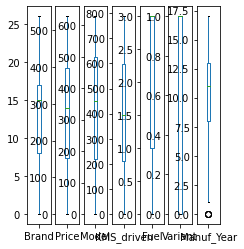

In [25]:
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,12))

there is no outlier present in the data set

In [26]:
ds.skew()

Brand         0.217283
Price        -0.081550
Model        -0.241473
KMS_driven   -0.005179
Fuel         -0.284671
Variant      -0.821517
Manuf_Year   -0.479178
dtype: float64

The skewness is in exceptable range

In [28]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds)
x=pd.DataFrame(x,columns=ds.columns)
x

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,0.169687,0.666824,0.881143,1.516307,-1.057164,0.670392,0.775939
1,0.169687,0.279172,-1.577140,-0.419669,0.891789,0.670392,0.775939
2,-0.881418,-0.516535,0.721300,1.191388,0.891789,0.670392,-0.817642
3,0.169687,-0.088078,1.316579,-0.947663,0.891789,0.670392,0.775939
4,0.169687,0.177158,-1.753519,1.101132,0.891789,0.670392,1.094655
...,...,...,...,...,...,...,...
5039,-1.031576,1.462532,1.503982,1.380924,0.891789,0.670392,1.094655
5040,0.470002,0.734834,0.517362,0.401654,-1.057164,-1.491665,0.138506
5041,0.019529,1.748170,0.583504,0.938673,-1.057164,0.670392,1.094655
5042,0.470002,-0.883785,0.324447,0.383603,-1.057164,-1.491665,-0.498926


In [29]:
x.shape

(5044, 7)

Creating feature and target dataframe

In [34]:
x=ds.drop(columns=['Price'])
y=ds['Price']

In [35]:
x.shape

(5044, 6)

In [36]:
y.shape

(5044,)

In [37]:
# To find the best random state using Linear Regressor model

from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    mod= LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.1864247218036824 on random state 198


In [39]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3530, 6)
(1514, 6)
(3530,)
(1514,)


70% of the data (3530 rows) will be available for training the model & 30% (1514 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable as continuous values we can build the regression models. Therefore oue evalution criteria will be: Evaluation Matrics : MAE,MSE,RMSE and R2 Score

In [40]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.11340039814876035

In [41]:
lm.coef_

array([-8.29029482e-01, -1.51274445e-02, -3.55228543e-02, -8.18666941e+00,
        2.50111179e+01,  1.49592469e+01])

In [42]:
lm.intercept_

148.60542946599094

In [43]:
from sklearn.metrics import r2_score
pred=lm.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute arror',mean_absolute_error(y_test,pred))
print('mean squarred arror',mean_squared_error(y_test,pred))
print('Root mean square arror',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.16879081155076536
mean absolute arror 110.28362589711007
mean squarred arror 18187.54018803121
Root mean square arror 134.86118859045848


In [44]:
# Decision Tree Regression Model
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)

0.9999772986704292

In [45]:
from sklearn.metrics import r2_score
pred=dc.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9948223095527094
mean absolute error 0.8603415738818646
mean squarred error 113.29212236810181
Root mean square error 10.643877224400036


In [46]:
# KNeighbors Regression Model
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

0.7637739282895116

In [47]:
from sklearn.metrics import r2_score
pred=kn.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.5325005250766723
mean absolute error 70.83130779392339
mean squarred error 10229.272734478203
Root mean square error 101.13986718637811


In [48]:
# Random Forest Regression Model
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9953998338673868

In [49]:
from sklearn.metrics import r2_score
pred=rf.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9772073864924118
mean absolute error 10.629855869774214
mean squarred error 498.7211160802045
Root mean square error 22.332064751836192


Based on the results of above models, and capomaring the R2 score and other evalution matrics result of MAE,MSE and RMSE.We can find the Random Forest Regression model is best model to predict the Happiness Score of countrien
                           Score     R2 Score         MAE            MSE            RMSE
1 LinearRegression          0.11       0.16            110            1800           134
2 DecisionTreeRegression    1         0.99            .86            113             10
3 KNeighbors Regression     0.76     0.53              70         10229            101
4 Random Forest Regression  0.97      0.97            10            498           22

Since the DecsionTree Regression model has the  hishest score(1) and R2 score(0.99) and lowest values of MAE, MSE,RMSE , it is the best model among the above four models

# Improving the model accuracy using cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
lmscores =cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.15348779 0.13308378 0.13360904 0.12732694 0.10220337]
0.12994218308017888 0.016455953000349258


In [51]:
from sklearn.model_selection import cross_val_score
dcscores =cross_val_score(dc,x,y,cv=5)
print(dcscores)
print(dcscores.mean(),dcscores.std())

[0.99999766 0.99996633 0.99996716 0.99996856 0.99997098]
0.9999741369483374 1.1864250293957816e-05


In [52]:
from sklearn.model_selection import cross_val_score
knnscores =cross_val_score(kn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.77084838 0.77738938 0.77626082 0.77998464 0.7823694 ]
0.7773705232266457 0.003888252633512558


In [53]:
from sklearn.model_selection import cross_val_score
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.99793597 0.99814718 0.99835948 0.99823671 0.99832327]
0.9982005238407903 0.0001513126625648721


It can be observed that the "DecisionTree Regressor" algorithim has the almost some positive accuracy score after the cross validation. So the best model with highet accuracy score and best on evalution with other matrix is "DecisionTree" is the best model for predicting the Price.

# HyperParameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV 
parameter={'max_depth':np.arange(1,10),'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}

In [60]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [61]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [75]:
dc_final=DecisionTreeRegressor(criterion= 'mae', max_depth= 80, max_features= 'auto')
dc_final.fit(x_train,y_train)
dc_final.score(x_train,y_train)

0.999963201073336

In [76]:
from sklearn.metrics import r2_score
pred=dc_final.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9952415759115552
mean absolute error 0.702774108322325
mean squarred error 104.11822985468956
Root mean square error 10.203834076203393


# Saving the best Model

In [77]:
import joblib
joblib.dump(dc_final,'Model_CarPrice.obj')

['Model_CarPrice.obj']